# Final Project: Sentiment Analysis on COVID-19 Vaccine with Tweets

- Number of records
- Number of columns
- Statistical summary of response variable
- Statistical summary of potential predictor variables (if there are a large number of predictors, select the top 10)
- Note: Summarize categorical variables with counts and percentages for each level and summarize numerical variables with mean/quantiles/standard deviation. Include up to five helpful graphs



In [2]:
import pandas
import os
import pandas as pd

# Getting the current directory of interest
thisdir = '/project/ds5559/twitter_sentiment_analysis_group/'

dfALL = pd.DataFrame()

# r=root, d=directories, f = files
for r, d, f in os.walk(thisdir):
    for file in f:
        if file.endswith(".csv"):
            filedir = os.path.join(r, file)
            print(filedir)
            tmpdf = pd.read_csv(filedir, index_col = 0, lineterminator='\n')
            dfALL = pd.concat([dfALL, tmpdf])

print(len(dfALL.index))


/project/ds5559/twitter_sentiment_analysis_group/hashtag_output_210318_0309.csv
/project/ds5559/twitter_sentiment_analysis_group/hashtag_output_210320_1148.csv
/project/ds5559/twitter_sentiment_analysis_group/hashtag_output_210321_1119.csv
/project/ds5559/twitter_sentiment_analysis_group/hashtag_output_210318_1359.csv
/project/ds5559/twitter_sentiment_analysis_group/hashtag_output_early_attempt.csv
/project/ds5559/twitter_sentiment_analysis_group/hashtag_output_210319_1252.csv
/project/ds5559/twitter_sentiment_analysis_group/hashtag_output_210319_2253.csv
/project/ds5559/twitter_sentiment_analysis_group/hashtag_output_210320_0902.csv
/project/ds5559/twitter_sentiment_analysis_group/hashtag_output_210317_1203.csv
/project/ds5559/twitter_sentiment_analysis_group/hashtag_output_210321_0531.csv
/project/ds5559/twitter_sentiment_analysis_group/hashtag_output_210321_0055.csv
/project/ds5559/twitter_sentiment_analysis_group/hashtag_output_210321_1044.csv
/project/ds5559/twitter_sentiment_anal

## Data Frame Dimension

In [3]:
# data_cx.shape
print(f'Our data frame contains {dfALL.shape[0]} rows and {dfALL.shape[1]} columns')

Our data frame contains 1244091 rows and 20 columns


In [4]:
data = dfALL.copy()
data.head(2)

,scraped_hashtag,scraped_order,created_at,id_str,text,truncated,in_reply_to_screen_name,retweet_count,favorite_count,lang,screen_name,user_name,user_description,user_verified,user_followers_count,hashtags,symbols,og_tweet_by,og_tweet_truncated\r,og_tweet_truncated
0,#vaccine,0,Thu Mar 18 01:05:26 +0000 2021,1372353417507565569,BIG NEWS from @GovSisolak: #COVID19Vaccine eli...,True,NaN,0,0,en,atdleft,Andrew Davey,"Muckraker, troublemaker, & no-BS-taker. I'm a ...",False,2034,['COVID19Vaccine'],[],NaN,\r,NaN
1,#vaccine,0,Thu Mar 18 01:05:15 +0000 2021,1372353373123407879,@TerryBrady2097 This #Health #COVID19 #Vaccine...,True,TerryBrady2097,0,0,en,pully8,rose lane,NaN,False,513,"['Health', 'COVID19', 'Vaccine', 'agedcare']",[],NaN,\r,NaN


In [5]:
data.columns

Index(['scraped_hashtag', 'scraped_order', 'created_at', 'id_str', 'text',
       'truncated', 'in_reply_to_screen_name', 'retweet_count',
       'favorite_count', 'lang', 'screen_name', 'user_name',
       'user_description', 'user_verified', 'user_followers_count', 'hashtags',
       'symbols', 'og_tweet_by', 'og_tweet_truncated\r', 'og_tweet_truncated'],
      dtype='object')

Goals:
- Statistical summary of potential predictor variables (if there are a large number of predictors, select the top 10)
  - Summarize categorical variables with counts and percentages for each level and summarize numerical variables with mean/quantiles/standard deviation. Include up to five helpful graphs


- Arshiya: reweet_count, favorite_count
- David: created_at, scraped_hashtag
- Kip: text, user_follower_count, user_description
- Tiger: hashtags, lang

## Response Variable

What we are planning to do is an unsupervised learning process, which aims to extract the sentiments of the general public towards the COVID-19 vaccine.

## Predictor Variable
Our main predictor variable will be the `text` column 

In [6]:
data.text.describe()

count                                               1244091
unique                                               165921
top       RT @DrEricDing: VACCINE ESCAPE OF VARIANTS vs ...
freq                                                  14260
Name: text, dtype: object

In [7]:
data.sort_values('text')

,scraped_hashtag,scraped_order,created_at,id_str,text,truncated,in_reply_to_screen_name,retweet_count,favorite_count,lang,screen_name,user_name,user_description,user_verified,user_followers_count,hashtags,symbols,og_tweet_by,og_tweet_truncated\r,og_tweet_truncated
148866,mrna,46,Sun Mar 21 06:52:30 +0000 2021,1373527921843789825,!! BOMBSHEL !! MAJOR ALERT !!\n\n#Moderna Chie...,True,NaN,2,1,en,sheasie,Xolotl Tlaloc (XTC) Ⓥ,knowledge is power\n\nxolotltlaloc @ https://t...,False,383,['Moderna'],[],NaN,NaN,NaN
70037,mrna,49,Sun Mar 21 06:52:30 +0000 2021,1373527921843789825,!! BOMBSHEL !! MAJOR ALERT !!\n\n#Moderna Chie...,True,NaN,3,1,en,sheasie,Xolotl Tlaloc (XTC) Ⓥ,knowledge is power\n\nxolotltlaloc @ https://t...,False,387,['Moderna'],[],NaN,\r,NaN
151123,mrna,46,Thu Mar 18 22:58:46 +0000 2021,1372683927509417984,!!! —&gt; We Fact-Checked This Dramatic mRNA V...,False,NaN,0,0,en,lisago_van,lisa van nostrand,“This is no time for ease and comfort. It is t...,False,221,[],[],NaN,\r,NaN
91946,astrazenecavaccine,31,Thu Mar 11 11:52:21 +0000 2021,1369979505545154568,""" #AstraZeneca Slides As #Denmark #Suspends #...",False,NaN,0,1,en,Flemington455,Welfare of the People should be the Supreme Law,"Hello, thank you for visiting our page. We h...",False,1000,"['AstraZeneca', 'Denmark', 'Suspends', 'Vaccin...",[],NaN,\r,NaN
133968,covidiots,59,Sun Mar 21 04:57:03 +0000 2021,1373498871322705924,""" #COVIDIOTS "" are real people that see the tr...",True,NaN,1,2,en,ZpydyZ,SPYD33,Just a person that thinks too differently alon...,False,13,['COVIDIOTS'],[],NaN,\r,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33985,covid19 biontech,25,Fri Mar 19 06:45:54 +0000 2021,1372801487638724612,🩺 Thank you #HongKong Government for facilitat...,True,NaN,9,32,en,EUinHKandMO,European Union Office to Hong Kong and Macao,🇪🇺🇭🇰🇲🇴 Official Twitter of the EU Office to Ho...,False,2178,"['HongKong', 'BioNTech', 'Vaccines']",[],NaN,\r,NaN
19274,covid19 biontech,26,Fri Mar 19 06:45:54 +0000 2021,1372801487638724612,🩺 Thank you #HongKong Government for facilitat...,True,NaN,9,31,en,EUinHKandMO,European Union Office to Hong Kong and Macao,🇪🇺🇭🇰🇲🇴 Official Twitter of the EU Office to Ho...,False,2179,"['HongKong', 'BioNTech', 'Vaccines']",[],NaN,\r,NaN
19561,covid19 biontech,26,Fri Mar 19 06:45:54 +0000 2021,1372801487638724612,🩺 Thank you #HongKong Government for facilitat...,True,NaN,9,29,en,EUinHKandMO,European Union Office to Hong Kong and Macao,🇪🇺🇭🇰🇲🇴 Official Twitter of the EU Office to Ho...,False,2177,"['HongKong', 'BioNTech', 'Vaccines']",[],NaN,\r,NaN
17565,#covid19 #biontech,24,Fri Mar 19 06:45:54 +0000 2021,1372801487638724612,🩺 Thank you #HongKong Government for facilitat...,True,NaN,9,30,en,EUinHKandMO,European Union Office to Hong Kong and Macao,🇪🇺🇭🇰🇲🇴 Official Twitter of the EU Office to Ho...,False,2177,"['HongKong', 'BioNTech', 'Vaccines']",[],NaN,NaN,NaN


In [6]:
data[['scraped_hashtag','text']].groupby('scraped_hashtag').count().sort_values('text', ascending = False)

,text
scraped_hashtag,
vaccinessavelives,41594
coronavirus astrazeneca,22700
gavi,22700
covidvaccine,22700
covid_19 astrazeneca,22700
...,...
#iwillgetvaccinated,16
#corona #biontech,16
#modernacovidvaccine,5


## Hashtags and Languages

In [10]:
data.lang.describe()

count     1244091
unique          1
top            en
freq      1244091
Name: lang, dtype: object

In [11]:
len(data.loc[data.lang != 'en'])

0

Here we can see that all of our scraped tweets are based on English.

In [12]:
data.hashtags.describe()

count     1244091
unique      22869
top            []
freq       766029
Name: hashtags, dtype: object

**There are 766029 tweets without hashtags.**

In [13]:
data.hashtags = data.hashtags.str.replace('[', '').str.replace(']', '').str.replace("'", "").str.replace(" ", "").str.split(',')

In [14]:
data.hashtags

0                                         [COVID19Vaccine]
1                     [Health, COVID19, Vaccine, agedcare]
2                                       [Florida, COVID19]
3                                                       []
4                                          [kissmeimirish]
                               ...                        
18600                                          [MustWatch]
18601                                                   []
18602                                      [Moderna, mRNA]
18603                                          [Canadians]
18604    [PoliceBrutality, Scamdemic, Plandemic, lockdo...
Name: hashtags, Length: 1244091, dtype: object

In [15]:
hashtages = [hashtages for sublist in list(data.hashtags) for hashtages in sublist]

In [16]:
hashtages[:20]

['COVID19Vaccine',
 'Health',
 'COVID19',
 'Vaccine',
 'agedcare',
 'Florida',
 'COVID19',
 '',
 'kissmeimirish',
 'COVID19Vaccine',
 'COVID',
 'Vaccine',
 '',
 'vaccine',
 'Vaccine',
 'COVID19',
 'vaccine',
 'Egypt',
 'Sinopharm',
 'COVID19']

In [17]:
from collections import Counter
hashtag_num = Counter(hashtages)

In [18]:
hashtag_num = pd.DataFrame.from_dict(hashtag_num, orient='index').reset_index()

In [19]:
hashtag_num.columns = ['hashtags', 'count']

In [20]:
hashtag_num.sort_values('count', ascending = False).head(10)

,hashtags,count
6,,766029
2,COVID19,99345
41,AstraZeneca,35886
37,CovidVaccine,33535
350,SputnikV,25405
9,vaccine,20558
0,COVID19Vaccine,19378
559,GetVaccinated,17866
325,CoronaVaccine,14743
676,astrazenecavaccine,14685


**Here we have the 10 most frequent hashtages.**

## Text and User Description

For the purpose of analysis, we are considering user descriptions as a part of a worldview which helps encapsulate opinions towards vaccines, so we have combined user descriptions with tweet content. 

In [21]:
tud = data[["text", "user_description"]].drop_duplicates()
tud['fulltext'] = tud.text + " " + tud.user_description.fillna("")
tud = tud.dropna().copy()
tud = tud.drop(columns=["text", "user_description"])
tud

,fulltext
0,BIG NEWS from @GovSisolak: #COVID19Vaccine eli...
2,"RT @GeoRebekah: Attention #Florida!\n\nIf you,..."
3,RT @JulianHillMP: Scotty promised Australians ...
4,Don’t #kissmeimirish ! Stand back at the end o...
5,BIG NEWS from @GovSisolak: #COVID19Vaccine eli...
...,...
18510,@pronoundecider @LiuYongfu6 @oaklandpolitics @...
18511,Love the #KungFlu https://t.co/nvWBxk23N4 Gang...
18528,RT @ExitEUbefree: @Thomas_Binder @LynnFynn3 @y...
18554,RT @TorontoWriter: Errors in health care: a le...


In [22]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer().fit(tud.fulltext)
bag_of_words = vec.transform(tud.fulltext)
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    
# vec = vectorizer.fit_transform(tud.fulltext)
# feats = vectorizer.get_feature_names()
# print(len(feats))

In [23]:
import numpy as np 

wf_df = pd.DataFrame(words_freq[:100], columns=["word", "freq"])
wf_df["log_freq"] = np.log(wf_df.freq)
wf_df.head(25)

,word,freq,log_freq
0,the,363216,12.802753
1,rt,229471,12.343532
2,of,218389,12.294033
3,to,212838,12.268287
4,and,203025,12.221084
5,co,167271,12.027371
6,https,166675,12.023801
7,in,148589,11.908939
8,is,120225,11.697120
9,vaccine,102349,11.536144


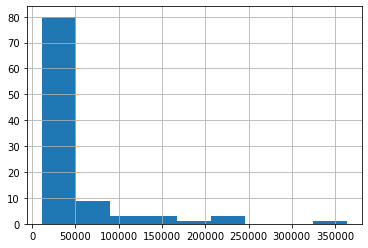

In [24]:
hist = wf_df.freq.hist(bins=9)

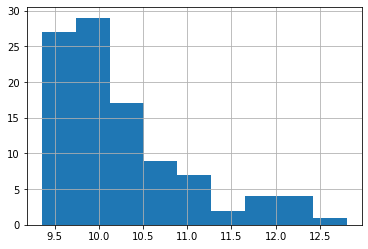

In [25]:
hist = wf_df.log_freq.hist(bins=9)

In [26]:
bag_of_words.shape

(336783, 427928)

**There are 427,928 unique words in this corpus of tweets and twitter user bios.** 

In addition, they appear to roughly follow Zipf's law of frequent proportional representation with a log-like decreasing curve of the log-frequency of words.

The most frequent words, as expected, are not particularly interesting, and mostly represent stop words, or at least the COVID Twitter equivalent. 

## User Follower Counts

In [27]:
 dfALL[["user_followers_count"]].describe()

,user_followers_count
count,1.244091e+06
mean,2.875744e+04
std,5.136353e+05
min,0.000000e+00
25%,1.360000e+02
50%,5.300000e+02
75%,2.063000e+03
max,6.115498e+07


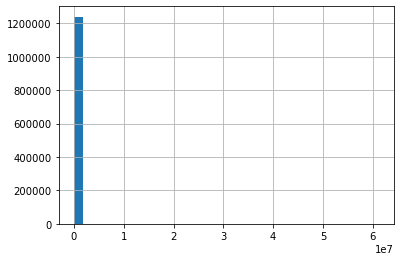

In [28]:
hist = dfALL.user_followers_count.hist(bins=35)

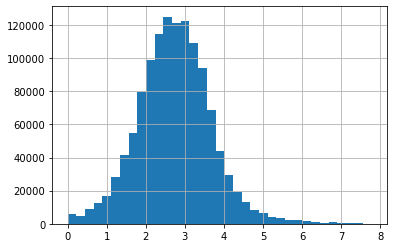

In [29]:
hist = np.log10(dfALL.user_followers_count + 1).hist(bins=35)

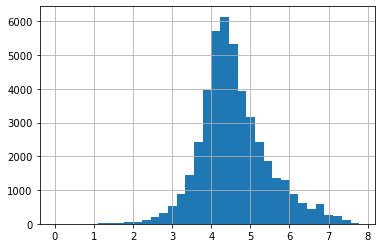

In [30]:
hist = np.log10(dfALL.user_followers_count.drop_duplicates() + 1).hist(bins=35)

The number of user followers is highly skewed upwards, with such range and variation that the standard deviation is higher than the mean. Indeed it's impossible to see the histogram distribution in raw values. By taking the natural log, we can see that user follower counts follow a standard Gaussian distribution. However, when we remove duplicates (looking at the distribution by unique user), there is an extremely large skew downwards. It seems that popular Twitter users are overly represented in our dataset. 

## Retweet Counts

In [31]:
data[["retweet_count"]].describe()

,retweet_count
count,1.244091e+06
mean,2.741226e+02
std,1.200028e+03
min,0.000000e+00
25%,1.000000e+00
50%,1.200000e+01
75%,1.240000e+02
max,1.366980e+05


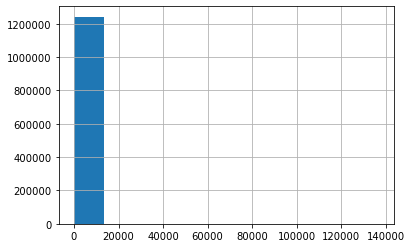

In [33]:
hist = data.retweet_count.hist(bins=10)

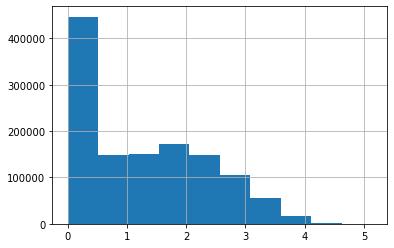

In [46]:
hist = np.log10(data.retweet_count+1).hist(bins=10)

The highly skewed distribution entails that some tweets (a smaller count of them) have an extremely high count of retweets. These would be 'viral' tweets, or tweets from government officials, celebrities, that get a lot of traction. Retweets allow people to share information shared in other tweets to their followers and timeline, and during the pandemic, it was a big tool Twitter users used to spread information about COVID-19 and the vaccine.

### Retweets Grouped by Hashtags 

In [50]:
rts = data[['scraped_hashtag','retweet_count']].groupby('scraped_hashtag').mean().sort_values('retweet_count', ascending = False)

In [64]:
cleaned_rts = rts.loc[~(rts==0).all(axis=1)]
cleaned_rts = cleaned_rts.reset_index()
cleaned_rts = cleaned_rts[:10]

print("Top ten scraped hashtags by retweet count")
cleaned_rts

Top ten scraped hashtags by retweet count


,scraped_hashtag,retweet_count
0,gavi,1577.018062
1,endthelockdown,1351.108117
2,covax,1334.543997
3,covid19 biontech,1079.868953
4,vaccine,915.345025
5,vaccination,713.256219
6,sputnikv,673.772467
7,vaccinate,621.014776
8,coronavirus biontech,613.337683
9,#sputnikv,565.373900


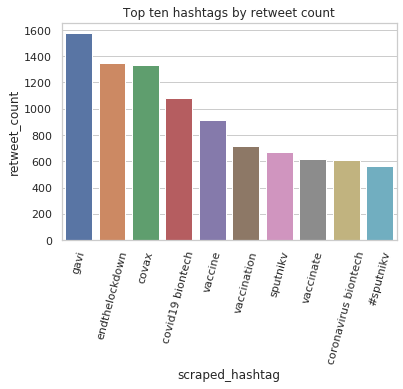

In [88]:
import seaborn as sns
import matplotlib as plt
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="scraped_hashtag", y="retweet_count", data=cleaned_rts)
ax.set_title("Top ten hashtags by retweet count")
for item in ax.get_xticklabels():
    item.set_rotation(75)

## Favorite Counts 

In [75]:
data[["favorite_count"]].describe()

,favorite_count
count,1.244091e+06
mean,2.349503e+00
std,6.712127e+01
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,2.632100e+04


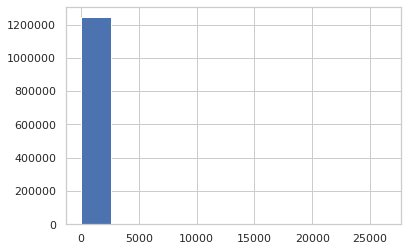

In [77]:
hist = data.favorite_count.hist(bins=10)

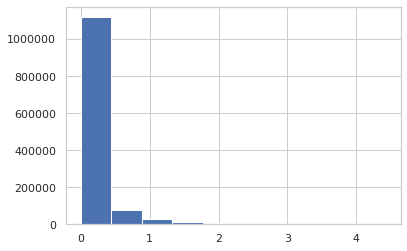

In [84]:
hist = np.log10(data.favorite_count+1).hist(bins=10)

It is surprising to see that the number of favorites per tweet is heavily skewed towards the lower end with a smaller range for the distrbution than the retweet count, because it could be hypothesized that the retweet and favorite distributions should look very similar due to them both being aspects of user interaction with a tweet. The only explanation of this difference could be that during the pandemic, users are more inclined to press retweet and share health information with their timeline, rather than just favorite and interact with tweets that way. 

### Favorite Counts Grouped by Hashtags 

In [90]:
faves = data[['scraped_hashtag','favorite_count']].groupby('scraped_hashtag').mean().sort_values('favorite_count', ascending = False)

In [91]:
cleaned_faves = faves.loc[~(faves==0).all(axis=1)]
cleaned_faves = cleaned_faves.reset_index()
cleaned_faves = cleaned_faves[:10]

print("Top ten scraped hashtags by favorite count")
cleaned_faves

Top ten scraped hashtags by favorite count


,scraped_hashtag,favorite_count
0,vaccinessavelives,7.719791
1,pfizercovidvaccine,4.489242
2,modernavaccine,4.484827
3,#pfizercovidvaccine,4.429213
4,covidvaccine pfizer,4.382253
5,#modernavaccine,4.143973
6,#vaccinessavelives,4.133586
7,#covid_19 #pfizer,4.007884
8,#plandemic,3.950668
9,#thisisourshot,3.680466


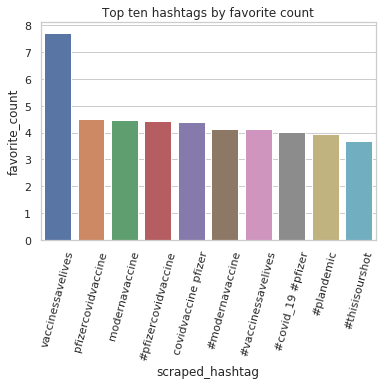

In [93]:
sns.set_theme(style="whitegrid")
ax2 = sns.barplot(x="scraped_hashtag", y="favorite_count", data=cleaned_faves)
ax2.set_title("Top ten hashtags by favorite count")
for item in ax2.get_xticklabels():
    item.set_rotation(75)